# Ploting grid search results

In [1]:
import numpy as np
import pandas as pd
from evaluation import evaluate
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [2]:
X_train = pd.read_csv('data/x_train.txt', header=None, delim_whitespace=True)
y_train = pd.read_csv('data/y_train.txt', header=None, delim_whitespace=True)
X_test = pd.read_csv('data/x_test.txt', header=None, delim_whitespace=True)
y_train = np.array(y_train).ravel()

In [3]:
X_train = X_train[[101, 102, 103, 105]]

In [4]:
from sklearn.preprocessing import StandardScaler
X_train_scaled = StandardScaler().fit_transform(X_train)

## Models comparison

In [5]:
from sklearn.model_selection import cross_val_score, KFold
#RandomForest
rf = RandomForestClassifier()
rf_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring=evaluate)

#ExtraTrees
et = ExtraTreesClassifier()
et_scores = cross_val_score(et, X_train_scaled, y_train, cv=5, scoring=evaluate)

#QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda_scores = cross_val_score(qda, X_train_scaled, y_train, cv=5, scoring=evaluate)

#XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb_scores = cross_val_score(xgb, X_train_scaled, y_train, cv=5, scoring=evaluate)

#MLP
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp_scores = cross_val_score(mlp, X_train_scaled, y_train, cv=5, scoring=evaluate)

#SVM
from sklearn.svm import SVC
svm = SVC(probability=True)
svm_scores = cross_val_score(svm, X_train_scaled, y_train, cv=5, scoring=evaluate)

#LGBM
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm_scores = cross_val_score(lgbm, X_train_scaled, y_train, cv=5, scoring=evaluate)

df = pd.DataFrame({'RandomForest': rf_scores, 'ExtraTrees': et_scores, 'QDA': qda_scores, 'XGBoost': xgb_scores, 'MLP': mlp_scores, 'SVM': svm_scores, 'LGBM': lgbm_scores})

Number of customers who took the offer:  138
Number of variables used:  4
Number of customers who took the offer:  145
Number of variables used:  4
Number of customers who took the offer:  137
Number of variables used:  4
Number of customers who took the offer:  148
Number of variables used:  4
Number of customers who took the offer:  137
Number of variables used:  4
Number of customers who took the offer:  137
Number of variables used:  4
Number of customers who took the offer:  146
Number of variables used:  4
Number of customers who took the offer:  144
Number of variables used:  4
Number of customers who took the offer:  144
Number of variables used:  4
Number of customers who took the offer:  144
Number of variables used:  4
Number of customers who took the offer:  151
Number of variables used:  4
Number of customers who took the offer:  147
Number of variables used:  4
Number of customers who took the offer:  160
Number of variables used:  4
Number of customers who took the offer

c:\Users\Janek\anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of customers who took the offer:  147
Number of variables used:  4
Number of customers who took the offer:  150
Number of variables used:  4
Number of customers who took the offer:  152
Number of variables used:  4
Number of customers who took the offer:  159
Number of variables used:  4


c:\Users\Janek\anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of customers who took the offer:  155
Number of variables used:  4
Number of customers who took the offer:  147
Number of variables used:  4
Number of customers who took the offer:  146
Number of variables used:  4
Number of customers who took the offer:  152
Number of variables used:  4
Number of customers who took the offer:  158
Number of variables used:  4
Number of customers who took the offer:  159
Number of variables used:  4
[LightGBM] [Info] Number of positive: 1997, number of negative: 2003
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000113 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499250 -> initscore=-0.003000
[LightGBM] [Info] Start training from score -0.003000
Number of customers who took the offer:  142
Number of variables u

In [6]:
df

,RandomForest,ExtraTrees,QDA,XGBoost,MLP,SVM,LGBM
0,6100.0,6050.0,6750.0,6250.0,6550.0,6550.0,6300.0
1,6450.0,6500.0,6550.0,6200.0,6700.0,6500.0,6500.0
2,6050.0,6400.0,7200.0,6350.0,6800.0,6800.0,6550.0
3,6600.0,6400.0,6900.0,6250.0,7150.0,7100.0,6800.0
4,6050.0,6400.0,7300.0,6150.0,6950.0,7150.0,6250.0


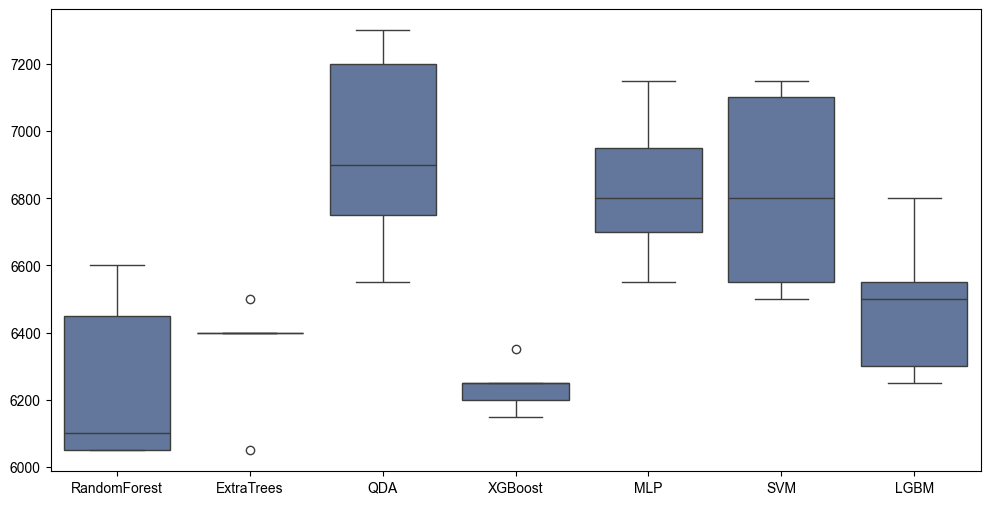

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, color='#5975a4')

sns.set(font_scale=1.2, style='darkgrid')

plt.show()

## SVM grid search results

In [8]:
df = pd.read_csv('data/svm_final_6.csv')
df.sort_values('rank_test_score', inplace=True)
df.shape

(1568, 21)

In [9]:
best_svm = df[['params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score']].iloc[0]

In [10]:
top_10 = df.iloc[:15][['params','split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']]
elements = [0, 150, 1000, 1400, 1510, 1567]
random_10 = df.iloc[elements]

In [11]:
random_10[['params', 'mean_test_score']]

,params,mean_test_score
134,"{'C': 5e-05, 'coef0': 2, 'degree': 2, 'gamma':...",7060.0
527,"{'C': 0.0001, 'coef0': 1.5, 'degree': 2, 'gamm...",7010.0
758,"{'C': 0.00015, 'coef0': 1.5, 'degree': 3, 'gam...",6950.0
21,"{'C': 5e-05, 'coef0': 1, 'degree': 3, 'gamma':...",6900.0
1312,"{'C': 0.0003, 'coef0': 2.5, 'degree': 2, 'gamm...",6640.0
0,"{'C': 5e-05, 'coef0': 1, 'degree': 2, 'gamma':...",4390.0


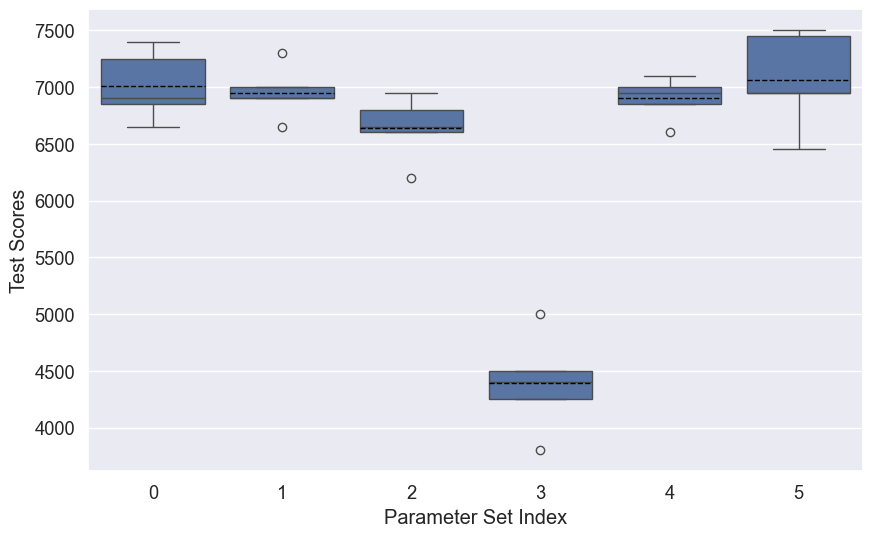

In [12]:
import seaborn as sns
from matplotlib import pyplot as plt

test_scores_melted = random_10.melt(id_vars=['params'], value_vars=[
    'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score'],
    var_name='Split', value_name='Test Score')

test_scores_melted['Parameter Set Index'] = test_scores_melted.groupby('params').ngroup()



plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2, style='darkgrid')
sns.boxplot(x='Parameter Set Index', y='Test Score', data=test_scores_melted, showmeans=True, meanline=True, meanprops={'color': 'black'})
plt.xlabel('Parameter Set Index')
plt.ylabel('Test Scores')
plt.show()

## MLP grid search results

In [13]:
df = pd.read_csv('data/mlp_final.csv')
df.sort_values('rank_test_score', inplace=True)

In [14]:
best_mlp = df[['params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score']].iloc[0]

In [15]:
elements = [0, 30, 50, 70, 90, 119]
random_10 = df.iloc[elements]

In [16]:
random_10[['params', 'mean_test_score']]

,params,mean_test_score
36,"{'activation': 'relu', 'alpha': 0.1, 'early_st...",6950.0
9,"{'activation': 'relu', 'alpha': 0.0001, 'early...",6780.0
56,"{'activation': 'tanh', 'alpha': 0.001, 'early_...",6730.0
51,"{'activation': 'tanh', 'alpha': 0.001, 'early_...",6410.0
111,"{'activation': 'logistic', 'alpha': 0.1, 'earl...",5030.0
97,"{'activation': 'logistic', 'alpha': 0.001, 'ea...",4790.0


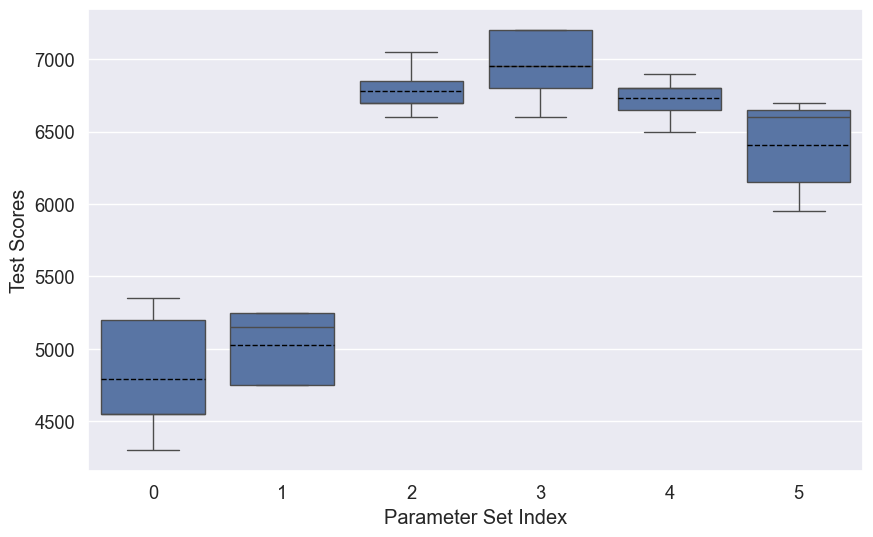

In [17]:
import seaborn as sns
from matplotlib import pyplot as plt

# Creating a new DataFrame suitable for seaborn's boxplot
test_scores_melted = random_10.melt(id_vars=['params'], value_vars=[
    'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score'],
    var_name='Split', value_name='Test Score')

# for each parameter set add column set same index
test_scores_melted['Parameter Set Index'] = test_scores_melted.groupby('params').ngroup()



# Plotting the boxplots using seaborn
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2, style='darkgrid')
#show mean as grey line, dont show median
sns.boxplot(x='Parameter Set Index', y='Test Score', data=test_scores_melted, showmeans=True, meanline=True, meanprops={'color': 'black'})
plt.xlabel('Parameter Set Index')
plt.ylabel('Test Scores')
plt.show()

## Best models comparison

In [18]:
best_svm = best_svm[['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']]
best_svm['model']='SVM'
best_svm_df = pd.DataFrame(best_svm).T

In [19]:
best_mlp = best_mlp[['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']]
best_mlp['model']='MLP'
best_mlp_df = pd.DataFrame(best_mlp).T

In [20]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

qda = QuadraticDiscriminantAnalysis()
qda_scores = cross_val_score(qda, X_train_scaled, y_train, cv=5, scoring=evaluate)

Number of customers who took the offer:  151
Number of variables used:  4
Number of customers who took the offer:  147
Number of variables used:  4
Number of customers who took the offer:  160
Number of variables used:  4
Number of customers who took the offer:  154
Number of variables used:  4
Number of customers who took the offer:  162
Number of variables used:  4


In [21]:
qda_scores_df = pd.DataFrame([qda_scores], columns=['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score'])
qda_scores_df['model'] = 'QDA'

In [22]:
all_scores = pd.concat([best_svm_df, qda_scores_df, best_mlp_df], ignore_index=True)

In [23]:
all_scores_melted = all_scores.melt(id_vars=['model'], value_vars=[
    'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score'],
    var_name='Split', value_name='Test Score')

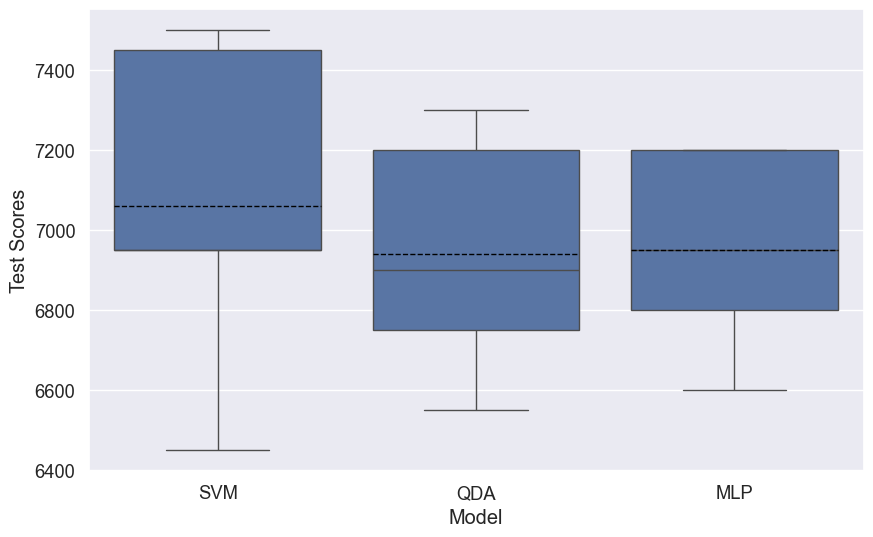

In [24]:
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2, style='darkgrid')
sns.boxplot(x='model', y='Test Score', data=all_scores_melted, showmeans=True, meanline=True, meanprops={'color': 'black'})
plt.xlabel('Model')
plt.ylabel('Test Scores')
plt.show()